In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load all images from source and target directories into memory
def load_images(source_path, target_path):
    src_list, tar_list = list(), list()
    # load images from source directory
    for filename in listdir(source_path):
        with rasterio.open(source_path + filename) as src:
            src_data = src.read()
            src_data = reshape_as_image(src_data)
            print("Source image shape:", src_data.shape)  # Print shape
            src_list.append(src_data)
    # load images from target directory
    for filename in listdir(target_path):
        with rasterio.open(target_path + filename) as tar:
            tar_data = tar.read()
            tar_data = reshape_as_image(tar_data)
            print("Target image shape:", tar_data.shape)  # Print shape
            tar_list.append(tar_data)
    return [asarray(src_list), asarray(tar_list)]

Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image shape: (128, 128, 3)
Source image s

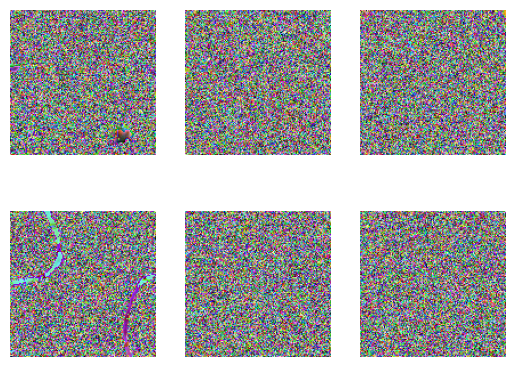

In [ ]:
import rasterio
from rasterio.plot import reshape_as_image
from matplotlib import pyplot
from os import listdir
from numpy import asarray, load
from numpy import vstack
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from numpy import savez_compressed
from matplotlib import pyplot
import numpy as np


# dataset paths
source_path = '/content/drive/MyDrive/Final_true_color_cropped/'
target_path = '/content/drive/MyDrive/Final__false_color_cropped/'
# load dataset
[src_images, tar_images] = load_images(source_path, target_path)
print('Loaded: ', src_images.shape, tar_images.shape)

n_samples = min(3, len(src_images))  # Ensure n_samples doesn't exceed the number of loaded images
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.imshow(src_images[i], cmap="gist_earth_r")
    pyplot.axis('off')
# plot target image
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + n_samples + i)
    pyplot.imshow(tar_images[i], cmap="gist_earth_r")
    pyplot.axis('off')
pyplot.show()


In [ ]:
# prompt: write a code of the gans which can convert the false color image to true color image consider src_images, tar_images

import numpy as np
# Define the dimensionality of the input noise to the generator
latent_dim = 100

# Define other necessary variables
input_shape = (32, 32, 3)  # Input shape of images
epochs = 100  # Number of training epochs
batch_size = 32  # Batch size for training

# Define the Generator network
def build_generator(latent_dim):
    model = keras.Sequential()
    model.add(layers.Dense(128 * 8 * 8, input_dim=latent_dim))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Reshape((8, 8, 128)))
    model.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Conv2D(3, (8,8), activation='sigmoid', padding='same'))
    return model

# Define the Discriminator network
def build_discriminator(input_shape):
    model = keras.Sequential()
    model.add(layers.Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=input_shape))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.4))
    model.add(layers.Conv2D(64, (3,3), strides=(2,2), padding='same'))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dropout(0.4))
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Define the GAN
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = keras.Sequential([generator, discriminator])
    return model

# Define the loss functions
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Compile the models
generator = build_generator(latent_dim)
discriminator = build_discriminator(input_shape)
gan = build_gan(generator, discriminator)
generator.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5))
gan.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5))
discriminator.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5))

# Training loop
for epoch in range(epochs):
    # Train Discriminator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generated_images = generator.predict(noise)
    real_loss = discriminator.train_on_batch(src_images, np.ones((batch_size, 1)))  # Placeholder for real_images
    fake_loss = discriminator.train_on_batch(generated_images, np.zeros((batch_size, 1)))
    discriminator_loss = 0.5 * np.add(real_loss, fake_loss)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print progress
    print(f"Epoch {epoch}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")

# Convert false color images to true color using the generator
generated_true_color_images = generator.predict(src_images)

# Save the generated true color images
for i, image in enumerate(generated_true_color_images):
    pyplot.imshow(image, cmap="gist_earth_r")
    pyplot.axis('off')
    pyplot.savefig(f'generated_true_color_image_{i}.png')
    pyplot.show()



In [ ]:
from skimage.transform import resize

# Training loop
for epoch in range(epochs):
    for i in range(0, len(src_images), batch_size):
        batch_src_images = src_images[i:i+batch_size]
        batch_tar_images = tar_images[i:i+batch_size]

        # Resize batch_tar_images to match the discriminator input shape
        resized_tar_images = []
        for image in batch_tar_images:
            resized_image = resize(image, (32, 32), anti_aliasing=True)
            resized_tar_images.append(resized_image)
        resized_tar_images = np.array(resized_tar_images)

        # Train Discriminator
        noise = np.random.normal(0, 1, (len(batch_src_images), latent_dim))
        generated_images = generator.predict(noise)
        real_loss = discriminator.train_on_batch(resized_tar_images, np.ones((len(batch_tar_images), 1)))
        fake_loss = discriminator.train_on_batch(generated_images, np.zeros((len(batch_tar_images), 1)))
        discriminator_loss = 0.5 * np.add(real_loss, fake_loss)

        # Train Generator
        noise = np.random.normal(0, 1, (batch_size, latent_dim))
        generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

        # Print progress
        print(f"Epoch {epoch}, Step {i//batch_size}, Discriminator Loss: {discriminator_loss}, Generator Loss: {generator_loss}")


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 323ms/step
Epoch 21, Step 28, Discriminator Loss: 1.1203248798847198, Generator Loss: 0.2567027807235718
1/1 [==============================] - 0s 320ms/step
Epoch 21, Step 29, Discriminator Loss: 1.125968337059021, Generator Loss: 0.27125436067581177
1/1 [==============================] - 0s 329ms/step
Epoch 21, Step 30, Discriminator Loss: 1.116877555847168, Generator Loss: 0.2568020224571228
1/1 [==============================] - 0s 89ms/step
Epoch 21, Step 31, Discriminator Loss: 1.137555569410324, Generator Loss: 0.26851657032966614
1/1 [==============================] - 1s 508ms/step
Epoch 22, Step 0, Discriminator Loss: 1.104645550251007, Generator Loss: 0.2568468153476715
1/1 [==============================] - 0s 334ms/step
Epoch 22, Step 1, Discriminator Loss: 1.1197261214256287, Generator Loss: 0.2750593423843384
1/1 [==============================] - 0s 321ms/step
Epoch 22, Step 2, D

In [ ]:
# Save the generator model
generator.save('generator_model.h5')

# Save the discriminator model
discriminator.save('discriminator_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import numpy as np
import cv2
from keras.models import load_model

def generate_predicted_image(generator, input_image_path):
    # Read the input image using OpenCV
    input_image = cv2.imread(input_image_path, cv2.IMREAD_UNCHANGED)

    # Check if the image was successfully loaded
    if input_image is None:
        raise ValueError(f"Unable to read the input image from '{input_image_path}'")

    # Normalize input image (assuming it is in the range [0, 255])
    input_image = input_image.astype('float32') / 255.0

    # Resize input image to match the input shape expected by the generator
    input_image = cv2.resize(input_image, (32, 32))

    # Generate random noise samples
    noise = np.random.normal(0, 1, (1, 100))  # Assuming latent_dim is 100

    # Generate predicted image using the generator model
    predicted_image = generator.predict(noise)

    return predicted_image

def save_image(image, output_path):
    # Convert the image from [0, 1] range to [0, 255] range
    image = (image * 255).astype(np.uint8)
    # Save the image
    cv2.imwrite(output_path, image)

# Load the pre-trained generator model
generator = load_model('generator_model.h5')

# Input image path
input_image_path = '/content/drive/MyDrive/Final_true color/true_Color_1.tif'

# Generate predicted output image
predicted_output = generate_predicted_image(generator, input_image_path)

# Output image path
output_image_path = 'predicted_output.png'

# Save the predicted output image
save_image(predicted_output[0], output_image_path)

print(f"Predicted output image saved at '{output_image_path}'")


1/1 [==============================] - 0s 434ms/step
Predicted output image saved at 'predicted_output.png'


In [ ]:
import numpy as np
import cv2
from keras.models import load_model
import imageio

def generate_predicted_image(generator, input_image_path):
    # Read the input image using OpenCV
    input_image = cv2.imread(input_image_path, cv2.IMREAD_UNCHANGED)

    # Check if the image was successfully loaded
    if input_image is None:
        raise ValueError(f"Unable to read the input image from '{input_image_path}'")

    # Normalize input image (assuming it is in the range [0, 255])
    input_image = input_image.astype('float32') / 255.0

    # Resize input image to match the input shape expected by the generator
    input_image = cv2.resize(input_image, (32, 32))

    # Generate random noise samples
    noise = np.random.normal(0, 1, (1, 100))  # Assuming latent_dim is 100

    # Generate predicted image using the generator model
    predicted_image = generator.predict(noise)

    return predicted_image

# Load the pre-trained generator model
generator = load_model('generator_model.h5')

# Input image path
input_image_path = '/content/drive/MyDrive/Final_true color/true_Color_1.tif'

# Generate predicted output image
predicted_output = generate_predicted_image(generator, input_image_path)

# Output image path
output_image_path = 'predicted_output.tif'

# Convert the predicted image from [0, 1] range to [0, 255] range and cast to uint8
predicted_output_uint8 = (predicted_output[0] * 255).astype(np.uint8)

# Save the predicted output image as TIFF using imageio
imageio.imwrite(output_image_path, predicted_output_uint8, format='TIFF')

print(f"Predicted output image saved at '{output_image_path}'")


1/1 [==============================] - 0s 245ms/step
Predicted output image saved at 'predicted_output.tif'
